### Tuberculosis Classification

Using Computer Vision techniques, we are aiming to train a Convolutional Neural Network to be able to predict whether a pair of lungs indicates a positive tuberculosis diagnosis or a negative one. Our model will be trained on a dataset obtained from kaggle. You can find the dataset [here](https://www.kaggle.com/datasets/iamtapendu/chest-x-ray-lungs-segmentation/data).

In [1]:
# Importing packages
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Image sizes and path to images
lungs_dir = 'tb_dataset/Chest-X-Ray/Chest-X-Ray/image'
lungs_mask_dir = 'tb_dataset/Chest-X-Ray/Chest-X-Ray/mask'

img_width, img_height = 160, 160

In [7]:
# Applying labels to data

# Getting metadata
metadata = pd.read_csv('tb_dataset/MetaData.csv')

# List all image files in the folder
image_files = os.listdir(lungs_dir)

# Verify mapping
for id in metadata['id']:
    image_name = f"{id}.png"
    if image_name not in image_files:
        print(f"Missing image: {image_name}")

# Add image paths to the dataset
metadata['image_path'] = metadata['id'].apply(lambda x: os.path.join(lungs_dir, f"{x}.png"))

# Verifying addition of new column
metadata[0:5]


,id,gender,age,county,ptb,remarks,image_path
0,1000,male,31,Shenxhen,0,normal,tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1000.png
1,1001,male,64,Shenxhen,0,normal,tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1001.png
2,1002,male,35,Shenxhen,0,normal,tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1002.png
3,1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis",tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1003.png
4,1004,male,2,Shenxhen,1,secondary PTB in the bilateral upper field,tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1004.png


In [10]:
# Creating dictionary of our dataset
lungs_dict = metadata[['image_path', 'ptb']].to_dict(orient='records')
lungs_dict[:5] # Verifying nothing got messed up

[{'image_path': 'tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1000.png', 'ptb': 0},
 {'image_path': 'tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1001.png', 'ptb': 0},
 {'image_path': 'tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1002.png', 'ptb': 0},
 {'image_path': 'tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1003.png', 'ptb': 1},
 {'image_path': 'tb_dataset/Chest-X-Ray/Chest-X-Ray/image/1004.png', 'ptb': 1}]

In [12]:
# Extracting paths and ptb using list comprehension
image_paths = [item['image_path'] for item in lungs_dict]
labels = [item['ptb'] for item in lungs_dict]

In [19]:
# Loading images from a list of file paths
def load_imgs_from_dir(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(img_height, img_width))  # Resize to desired dimensions
        img_array = img_to_array(img)  # Convert to NumPy array
        images.append(img_array)
    return images

In [20]:
# Loading images (could take a while)
lungs_images = load_imgs_from_dir(image_paths)

In [41]:
print("Total images:",len(lungs_images),"\nTotal Labels:",len(labels))


Total images: 704 
Total Labels: 704


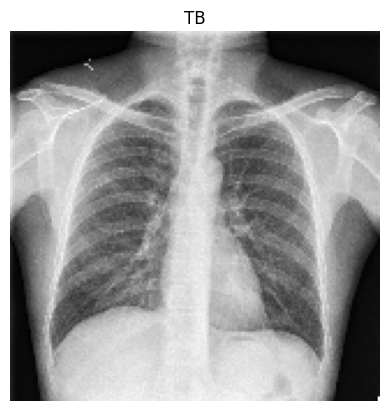

In [50]:
index = 13
# Seeing an image to make sure loaded properly along with its label
plt.imshow(lungs_images[index].astype('uint8'))
plt.title('TB' if labels[index] == 1 else 'No TB')
plt.axis('off')
plt.show()